In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df1 = df.rename(columns={"Annual Income (k$)":"Annual Income","Spending Score (1-100)":"Spending Score"})

In [5]:
df1.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df1['Gender'].replace(['Male','Female'],[0,1],inplace=True)

In [8]:
df1

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      200 non-null    int64
 1   Gender          200 non-null    int64
 2   Age             200 non-null    int64
 3   Annual Income   200 non-null    int64
 4   Spending Score  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [10]:
df1.nunique().sort_values(ascending= True)

Gender              2
Age                51
Annual Income      64
Spending Score     84
CustomerID        200
dtype: int64

In [11]:
df1 = df1.drop("CustomerID", axis=1)

In [12]:
df1

,Gender,Age,Annual Income,Spending Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [13]:
df1.isna().sum()

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [14]:
df1.columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [15]:
int_col = df1.select_dtypes(include=["int64"]).columns.tolist()
int_col

['Gender', 'Age', 'Annual Income', 'Spending Score']

Check the outlier exsist in the int64 columns


<function matplotlib.pyplot.show(close=None, block=None)>

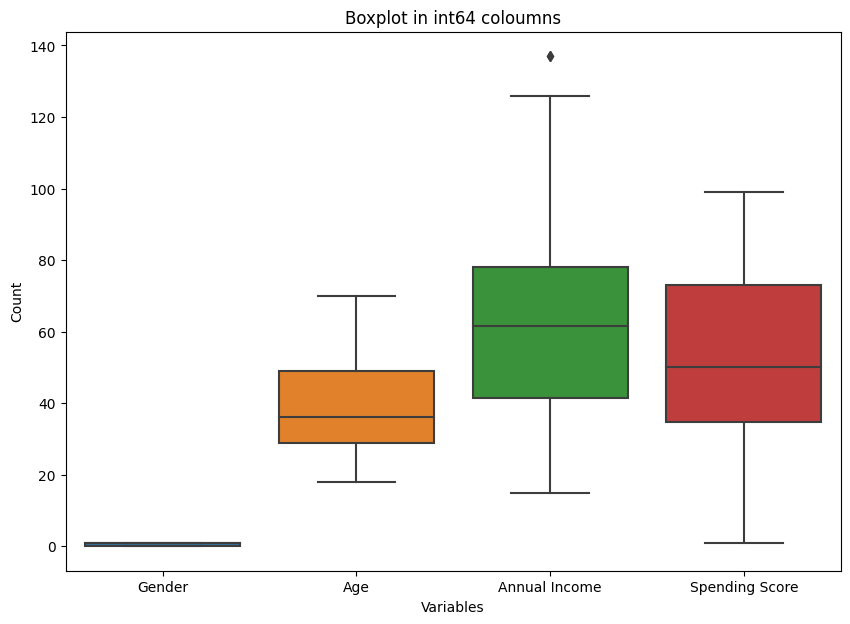

In [16]:
fig = plt.figure(figsize =(10, 7))
plt.title("Boxplot in int64 coloumns")
sns.boxplot(df1[int_col])
plt.xlabel("Variables")
plt.ylabel("Count")
plt.show

###### In "Annual Income" there is a outlier but this outlier can be ignoreable

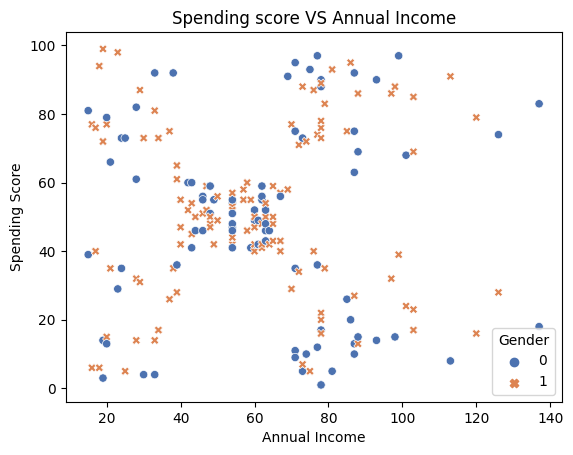

In [17]:
plt.title("Spending score VS Annual Income")
sns.scatterplot(df1,x="Annual Income", y="Spending Score", hue="Gender",style ="Gender",palette="deep")
plt.show()

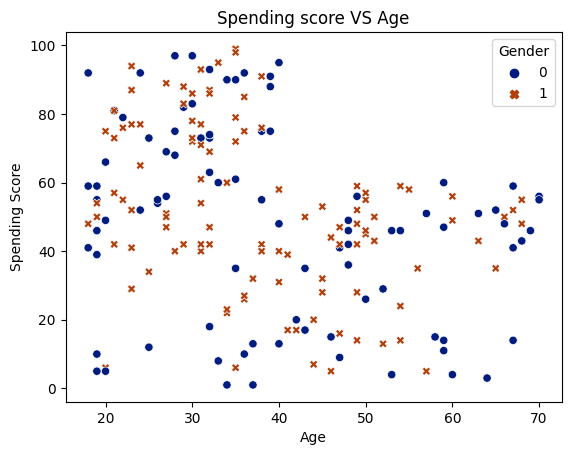

In [18]:
plt.title("Spending score VS Age")
sns.scatterplot(df1,x="Age", y="Spending Score", hue="Gender",style ="Gender",palette="dark")
plt.show()

<Axes: title={'center': 'Age Count'}, xlabel='Age', ylabel='Count'>

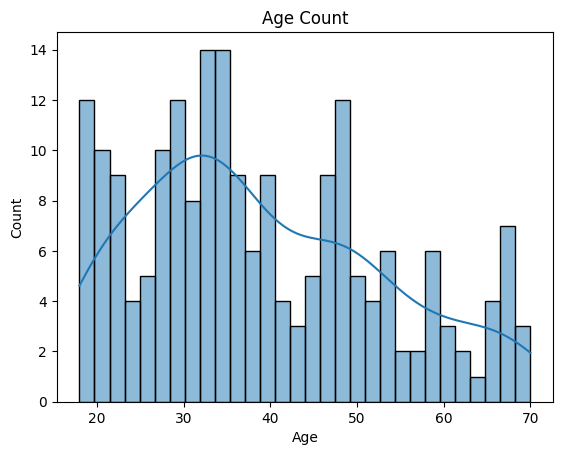

In [19]:
plt.title("Age Count")
sns.histplot(df1,x="Age",bins = 30,kde=True)

<Axes: title={'center': 'Annual Income Count'}, xlabel='Annual Income', ylabel='Count'>

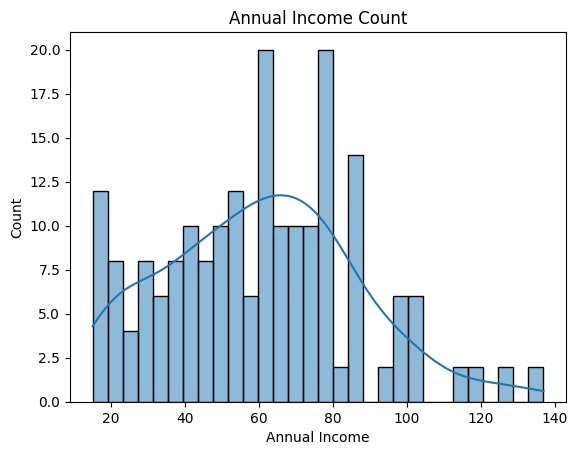

In [20]:
plt.title("Annual Income Count")
sns.histplot(df1,x="Annual Income",bins = 30,kde=True)

<Axes: title={'center': 'Spending score Count'}, xlabel='Spending Score', ylabel='Count'>

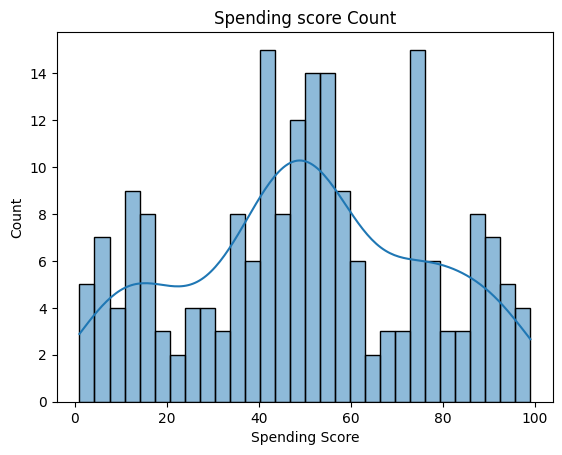

In [21]:
plt.title("Spending score Count")
sns.histplot(df1,x="Spending Score",bins = 30,kde=True)

# K-Means Clustering Technique

In [22]:
scale=StandardScaler()
scale_value=scale.fit_transform(df1[["Annual Income","Spending Score"]])

In [23]:
scale_df = pd.DataFrame( scale_value, columns = df1.columns[2:4].tolist()) 
scale_df

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


## Elbow Method

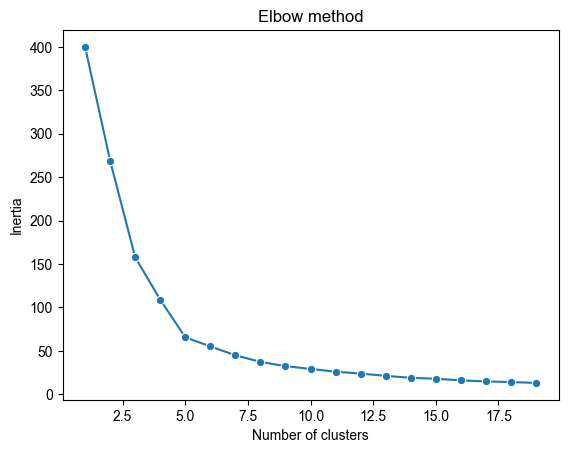

In [24]:
inertias = []
k_s = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=69)
    kmeans.fit(scale_df)
    inertias.append(kmeans.inertia_)
    k_s.append(k)


sns.lineplot(x= k_s, y= inertias, marker='o')
sns.set_theme(style="darkgrid")
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

###### The elbow method shows that 5 is a good value for K, so we retrain and visualize the result:

##### Train and Fit into this model

In [25]:
n_clusters=5
kmeans = KMeans(init="random",n_clusters=5,n_init=10,max_iter=10,random_state=69)

In [26]:
 kmeans.fit(scale_df)

KMeans(init='random', max_iter=10, n_clusters=5, n_init=10, random_state=69)

##### Number of lables (0,1,2,3,4)

In [27]:
cluster = kmeans.labels_
cluster

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3,
       1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

##### Inertia of this dataset

In [28]:
kmeans.inertia_

65.56840815571682

##### Final Centroids Positions

In [29]:
centroids = kmeans.cluster_centers_
centroids

array([[-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617],
       [-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907]])

##### Number of Iteration

In [30]:
kmeans.n_iter_

5

In [31]:
new_df = scale_df.assign(clusters=pd.DataFrame(cluster))
new_df

,Annual Income,Spending Score,clusters
0,-1.738999,-0.434801,2
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,2
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,2
...,...,...,...
195,2.268791,1.118061,3
196,2.497807,-0.861839,4
197,2.497807,0.923953,3
198,2.917671,-1.250054,4


##### Visualization of the K-Means Clustering Tchnique in this present dataset

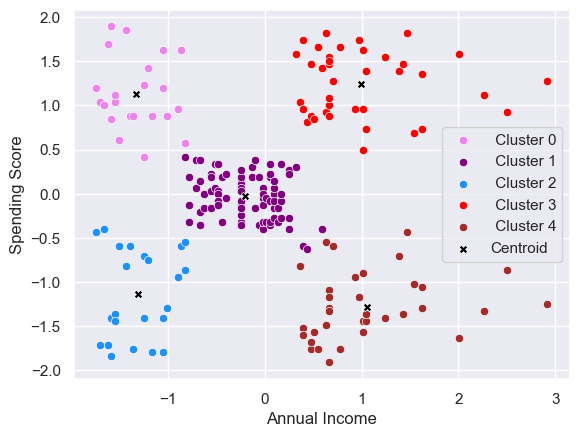

In [32]:
k=0
color = [ "violet","purple","dodgerblue","red","brown"]
for k in range(n_clusters):
  sns.scatterplot(x=new_df[new_df.clusters == k]["Annual Income"],y=new_df[new_df.clusters == k]["Spending Score"],
                  c=color[k],marker="o",label=f' Cluster {k}')
sns.scatterplot(x=centroids[:,0],y=centroids[:,1],c="black",marker="X",label="Centroid")
xlabel='Annual Income'
ylabel='Spending Score'

# Hierarchical Clustering

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [35.0, 35.0, 54.375, 54.375],
  [12.5, 12.5, 44.6875, 44.6875],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [142.5, 142.5, 170.0, 170.0],
  [125.0, 125.0, 156.25, 156.25],
  [185.0, 185.0, 195.0, 195.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [190.0, 190.0, 212.5, 212.5],
  [140.625, 140.625, 201.25, 201.25],
  [102.5, 102.5, 170.9375, 170.9375],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [282.5, 282.5, 312.5, 312.5],
  [250.0, 250.0, 297.5, 297.5],
  [335.0, 335.0, 345.0, 345.0],
  [355.0

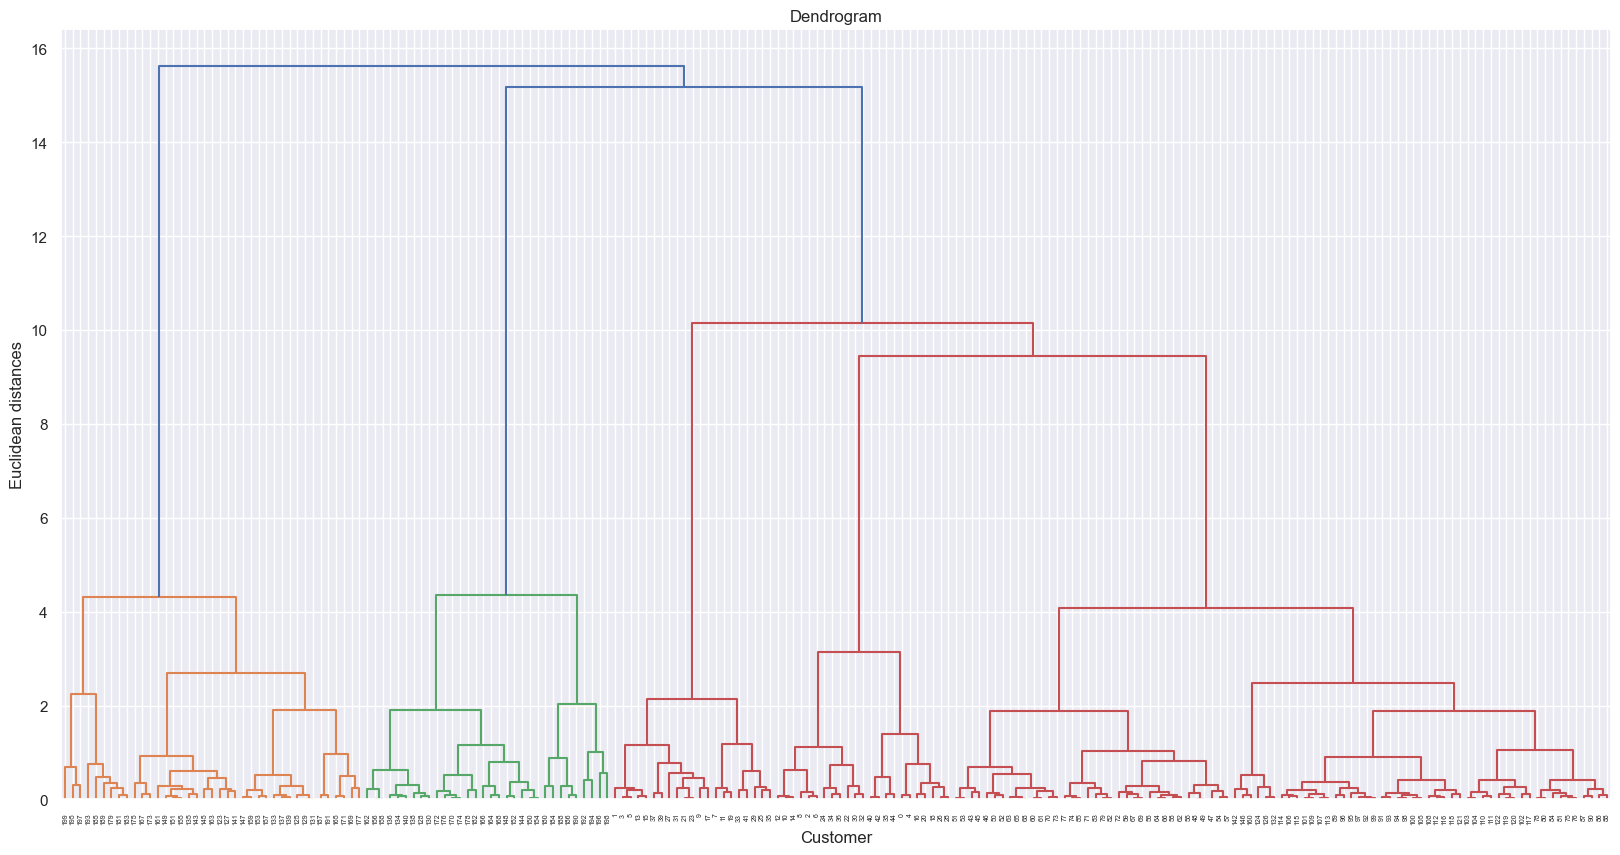

In [33]:
plt.figure(figsize=(20,10))
link_data = linkage(scale_df, method='ward', metric='euclidean')
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Euclidean distances")
dendrogram(link_data)

In [34]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [35]:
hierarchical_cluster.fit(scale_df)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [36]:
labels = hierarchical_cluster.fit_predict(scale_df)
labels

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [37]:
new_df1 = scale_df.assign(clusters=pd.DataFrame(labels))
new_df1

,Annual Income,Spending Score,clusters
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,0
197,2.497807,0.923953,1
198,2.917671,-1.250054,0
